## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

#(delete "#" below to display data frame)
#combined_data

## Summary statistics

In [3]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_data = combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_data_df = drug_data.pivot(columns = "Drug Regimen", values = "Tumor Volume (mm3)")
drug_data_stat = drug_data_df.describe()

variance = drug_data_df.var(axis = 0, skipna = True)
variance_df = pd.DataFrame(variance)
variance_df = variance_df.rename(columns = {0:"Variance"})
variance_df = variance_df.transpose()

SEM = drug_data_df.sem(axis = 0, skipna = True, numeric_only = float)
SEM_df = pd.DataFrame(SEM)
SEM_df = SEM_df.rename(columns = {0:"SEM"})
SEM_df = SEM_df.transpose()

Tumor_Summary_Data = pd.concat([drug_data_stat, variance_df, SEM_df])
Tumor_Summary_Data

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
count,230.000000,178.000000,178.000000,188.000000,186.000000,181.000000,161.000000,228.000000,181.000000,182.000000
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
min,23.343598,45.000000,36.321346,45.000000,45.000000,45.000000,45.000000,22.050126,45.000000,45.000000
25%,37.685933,47.208427,47.312353,48.232987,47.285874,47.459053,47.081086,36.674635,48.047139,47.337876
50%,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
75%,45.000000,56.801438,57.314444,60.870951,59.963034,59.916934,56.184664,45.000000,58.719297,57.954259
max,48.158209,68.923185,72.226731,78.567014,76.668817,73.212939,72.455421,47.622816,75.123690,73.324432
Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


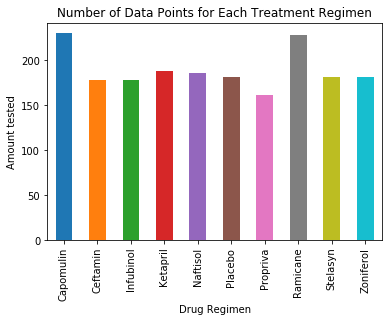

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_plot1 = Tumor_Summary_Data.iloc[0].plot(kind = "bar")
plt.ylabel("Amount tested")
plt.title("Number of Data Points for Each Treatment Regimen")
plt.show()

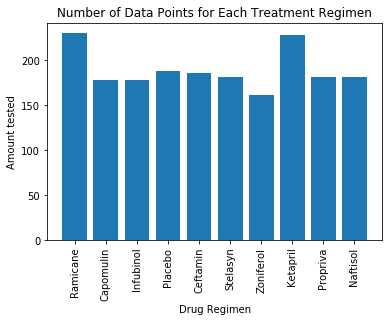

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs = combined_data["Drug Regimen"].unique()
plt.bar(drugs, Tumor_Summary_Data.iloc[0] )
plt.title("Number of Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Amount tested")
plt.xticks(rotation = 90)
plt.show()

## Pie plots

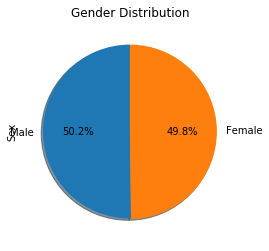

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_metadata["Sex"].value_counts()
bar_plot1 = gender_count.plot(kind = "pie", startangle = 90, autopct = "%1.1f%%", shadow = True)
plt.title("Gender Distribution")
plt.show()

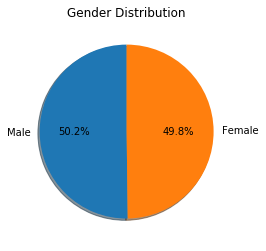

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, startangle = 90, autopct = "%1.1f%%", shadow = True, labels = ["Male", "Female"])
plt.title("Gender Distribution")

plt.show()

## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.


In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen